# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [8]:
# Display basic information about the dataset
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

print("\n" + "=" * 50)
print("DATA TYPES")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("MISSING VALUES")
print("=" * 50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

print("\n" + "=" * 50)
print("BASIC STATISTICS (Numerical Columns)")
print("=" * 50)
print(df.describe())

print("\n" + "=" * 50)
print("CATEGORICAL COLUMNS - UNIQUE VALUES")
print("=" * 50)
categorical_cols = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
                    'HomeOwnershipStatus', 'LoanPurpose', 'LoanApproved']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].nunique()} unique values")
        print(f"  Values: {df[col].unique()}")

print("\n" + "=" * 50)
print("SAMPLE DATA")
print("=" * 50)
df.head(10)

DATASET OVERVIEW

Dataset Shape: 20000 rows, 19 columns

DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ApplicationNumber             20000 non-null  int64  
 1   Age                           20000 non-null  int64  
 2   AnnualIncome                  20000 non-null  float64
 3   CreditScore                   20000 non-null  int64  
 4   EmploymentStatus              20000 non-null  object 
 5   EducationLevel                20000 non-null  object 
 6   LoanAmount                    20000 non-null  float64
 7   LoanDuration                  20000 non-null  int64  
 8   MaritalStatus                 20000 non-null  object 
 9   NumberOfDependents            20000 non-null  int64  
 10  HomeOwnershipStatus           20000 non-null  object 
 11  BankruptcyHistory             20000 non-null  int64

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved,Monthly_Debt_To_Income_Ratio
0,26231,18,26992.0,586,Employed,Diploma,22432.0,36,Single,3,Mortgage,0,Debt Consolidation,0,623.110,2249.33,3,No,0.277020
1,13176,18,22825.0,581,Self-Employed,Master,30457.0,24,Single,0,Rent,0,Home Improvement,0,1269.040,1902.08,5,No,0.667185
2,27751,18,75891.0,522,Employed,Bachelor,30583.0,96,Married,2,Mortgage,0,Personal,0,318.570,6324.25,6,No,0.050373
3,20628,18,92094.0,565,Employed,Bachelor,72738.0,36,Single,1,Mortgage,0,Vehicle,0,439.185,7674.50,3,No,0.057227
4,28773,18,35686.0,554,Employed,Diploma,28021.0,36,Married,3,Rent,0,Home Improvement,0,778.360,2973.83,1,No,0.261737
5,25269,18,51003.0,586,Self-Employed,Bachelor,17497.0,72,Married,0,Other,0,Vehicle,0,439.185,4034.46,3,No,0.108858
6,10786,18,47185.0,531,Unemployed,Diploma,18490.0,48,Single,2,Rent,0,Home Improvement,1,439.185,3932.08,3,No,0.111693
7,20270,18,44425.0,574,Employed,High School,33360.0,24,Married,1,Mortgage,0,Home Improvement,0,1390.000,3702.08,7,No,0.375465
8,26864,18,40600.0,479,Unemployed,Bachelor,18544.0,48,Single,3,Mortgage,0,Education,1,386.330,3383.33,4,No,0.114186
9,23279,18,15000.0,621,Employed,Bachelor,10255.0,48,Single,0,Other,0,Vehicle,0,213.650,4034.46,1,No,0.052956


## Data Cleaning

In [7]:
# Step 1: Check for missing values
print("=" * 50)
print("CHECKING FOR MISSING VALUES")
print("=" * 50)
missing_summary = df.isnull().sum()
print(missing_summary)
print(f"\nTotal missing values: {missing_summary.sum()}")

# Step 2: Check data types and identify issues
print("\n" + "=" * 50)
print("CHECKING DATA TYPES")
print("=" * 50)
print(df.dtypes)

# Step 3: Fix numerical columns that are stored as strings
print("\n" + "=" * 50)
print("FIXING DATA TYPE ISSUES")
print("=" * 50)

# List of columns that should be numerical
numerical_columns = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
                     'LoanDuration', 'NumberOfDependents', 'BankruptcyHistory',
                     'PreviousLoanDefaults', 'MonthlyLoanPayment',
                     'MonthlyIncome', 'JobTenure']

for col in numerical_columns:
    if col in df.columns:
        # Check if column is object type (string)
        if df[col].dtype == 'object':
            print(f"\n✓ Converting {col} from {df[col].dtype} to numeric")
            # Remove any non-numeric characters (like $, commas, etc.)
            df[col] = pd.to_numeric(df[col].str.replace(r'[^\d.]', '', regex=True), errors='coerce')
        else:
            print(f"✓ {col} is already numeric ({df[col].dtype})")

# Step 4: Handle missing values for numerical columns
print("\n" + "=" * 50)
print("HANDLING MISSING VALUES - NUMERICAL COLUMNS")
print("=" * 50)

# Exclude identifier column
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'ApplicationNumber' in numerical_cols:
    numerical_cols.remove('ApplicationNumber')

for col in numerical_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"✓ {col}: Filled {missing_count} missing values with median = {median_value:.2f}")
        print(f"  Justification: Median is robust to outliers for numerical data")
    else:
        print(f"✓ {col}: No missing values")

# Step 5: Handle missing values for categorical columns
print("\n" + "=" * 50)
print("HANDLING MISSING VALUES - CATEGORICAL COLUMNS")
print("=" * 50)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"✓ {col}: Filled {missing_count} missing values with mode = '{mode_value}'")
        print(f"  Justification: Mode preserves the most common category")
    else:
        print(f"✓ {col}: No missing values")

# Step 6: Check for inconsistencies in categorical columns
print("\n" + "=" * 50)
print("CHECKING FOR INCONSISTENCIES")
print("=" * 50)
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"\n{col}: {len(unique_vals)} unique values")
    print(f"  Values: {unique_vals}")

    # Check for potential issues (extra spaces, case issues, etc.)
    if any(str(val) != str(val).strip() for val in unique_vals if pd.notna(val)):
        print(f"  ⚠ Warning: Found values with extra spaces")
        df[col] = df[col].str.strip()

# Step 7: Feature Engineering - Monthly_Debt_To_Income_Ratio
print("\n" + "=" * 50)
print("FEATURE ENGINEERING")
print("=" * 50)
df['Monthly_Debt_To_Income_Ratio'] = df['MonthlyLoanPayment'] / df['MonthlyIncome']
print("✓ Created new feature: Monthly_Debt_To_Income_Ratio")
print("  Formula: MonthlyLoanPayment / MonthlyIncome")
print("  Justification: This ratio indicates the proportion of monthly income")
print("  committed to loan repayment, a key indicator of financial burden.")
print("\nSample values:")
print(df[['MonthlyLoanPayment', 'MonthlyIncome', 'Monthly_Debt_To_Income_Ratio']].head(10))

# Step 8: Verify cleaning is complete
print("\n" + "=" * 50)
print("VERIFICATION - POST CLEANING")
print("=" * 50)
remaining_nulls = df.isnull().sum().sum()
print(f"Remaining missing values: {remaining_nulls}")
if remaining_nulls == 0:
    print("✓ Data cleaning completed successfully! No missing values remain.")
else:
    print("⚠ Warning: Some missing values still present")

print(f"\nFinal dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Display updated data types
print("\n" + "=" * 50)
print("FINAL DATA TYPES")
print("=" * 50)
print(df.dtypes)

CHECKING FOR MISSING VALUES
ApplicationNumber               0
Age                             0
AnnualIncome                    0
CreditScore                     0
EmploymentStatus                0
EducationLevel                  0
LoanAmount                      0
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
BankruptcyHistory               0
LoanPurpose                     0
PreviousLoanDefaults            0
MonthlyLoanPayment              0
MonthlyIncome                   0
JobTenure                       0
LoanApproved                    0
Monthly_Debt_To_Income_Ratio    0
dtype: int64

Total missing values: 0

CHECKING DATA TYPES
ApplicationNumber                 int64
Age                               int64
AnnualIncome                    float64
CreditScore                       int64
EmploymentStatus                 object
EducationLevel                   object
LoanAmount                 

## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

/tmp/ipython-input-3705728673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=approval_by_education, x='EducationLevel', y='ApprovalRate',


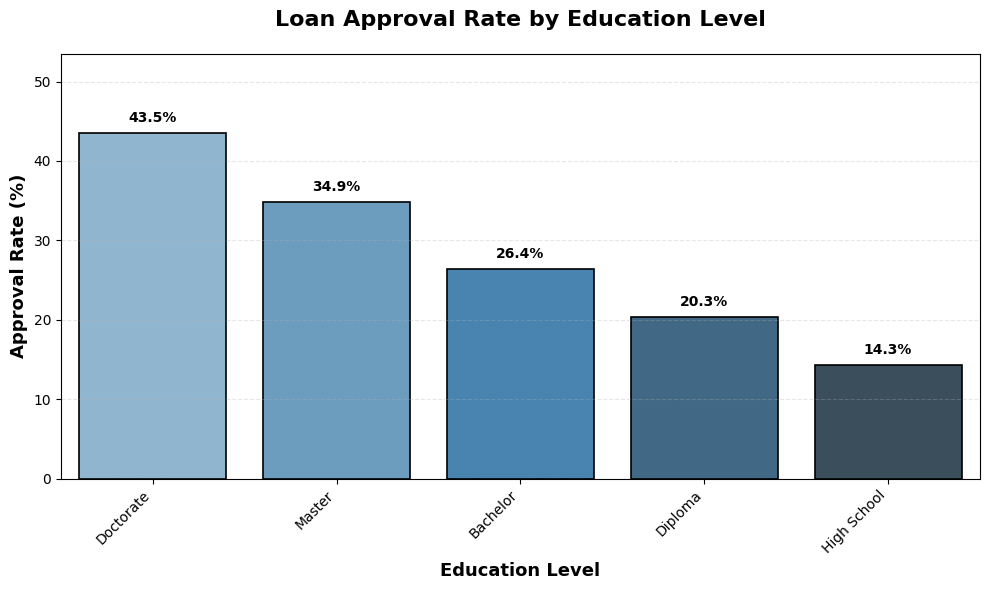

Approval Rates by Education Level (Highest to Lowest):
Doctorate      : 43.50%
Master         : 34.89%
Bachelor       : 26.43%
Diploma        : 20.33%
High School    : 14.32%


In [2]:
# Calculate approval rate by education level
approval_by_education = df.groupby('EducationLevel')['LoanApproved'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).sort_values(ascending=False).reset_index()
approval_by_education.columns = ['EducationLevel', 'ApprovalRate']

# Create bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=approval_by_education, x='EducationLevel', y='ApprovalRate',
                 palette='Blues_d', edgecolor='black', linewidth=1.2)

# Add value labels on bars
for i, v in enumerate(approval_by_education['ApprovalRate']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('Loan Approval Rate by Education Level', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Education Level', fontsize=13, fontweight='bold')
plt.ylabel('Approval Rate (%)', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(approval_by_education['ApprovalRate']) + 10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print the ordered values
print("Approval Rates by Education Level (Highest to Lowest):")
print("=" * 50)
for _, row in approval_by_education.iterrows():
    print(f"{row['EducationLevel']:15s}: {row['ApprovalRate']:5.2f}%")

Based on the analysis Doctrate has the highest loan approval rate at approximately 43.50%, followed by Master at 34.89%. The complete ordering from highest to lowest shows that higher education levels generally correspond with better loan approval chances most likely due to higher income potential and perceived financial stability.


**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

In [9]:
# Filter for approved applicants only
approved_df = df[df['LoanApproved'] == 'Yes'].copy()

print(f"Number of approved applicants: {len(approved_df)}")
print(f"Percentage of total applicants: {len(approved_df)/len(df)*100:.2f}%\n")

Number of approved applicants: 4745
Percentage of total applicants: 23.72%



**Visualization**

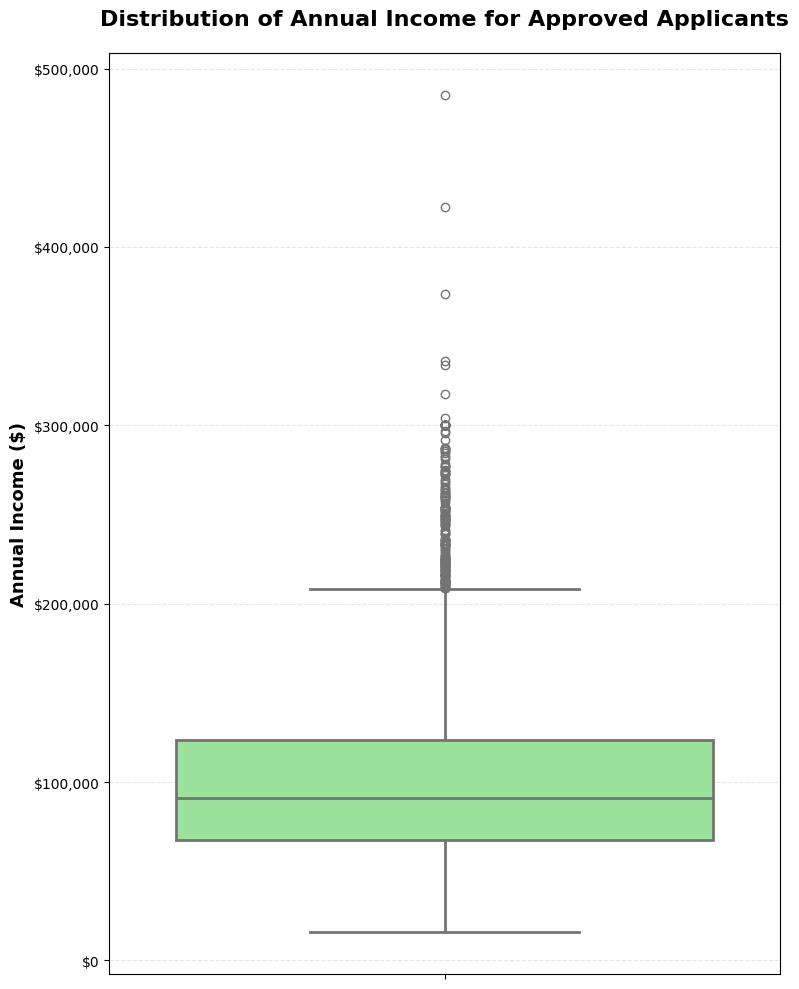

QUARTILE ANALYSIS - ANNUAL INCOME (APPROVED APPLICANTS)

Minimum:               $      15,787.00
Q1 (25th percentile):  $      67,367.00
Q2 (Median/50th):      $      91,274.00
Q3 (75th percentile):  $     123,816.00
Maximum:               $     485,341.00

Mean:                  $     102,173.06
IQR (Q3 - Q1):         $      56,449.00
Range:                 $     469,554.00


In [10]:
# Create box plot using seaborn
plt.figure(figsize=(8, 10))
ax = sns.boxplot(y=approved_df['AnnualIncome'], color='lightgreen',
                 linewidth=2, fliersize=6)

# Customize the median line to be red
for patch in ax.artists:
    patch.set_edgecolor('darkgreen')

plt.title('Distribution of Annual Income for Approved Applicants',
         fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Annual Income ($)', fontsize=13, fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Calculate quartiles and statistics
q1 = approved_df['AnnualIncome'].quantile(0.25)
q2 = approved_df['AnnualIncome'].quantile(0.50)  # median
q3 = approved_df['AnnualIncome'].quantile(0.75)
iqr = q3 - q1
min_val = approved_df['AnnualIncome'].min()
max_val = approved_df['AnnualIncome'].max()
mean_val = approved_df['AnnualIncome'].mean()

print("=" * 60)
print("QUARTILE ANALYSIS - ANNUAL INCOME (APPROVED APPLICANTS)")
print("=" * 60)
print(f"\nMinimum:               ${min_val:>15,.2f}")
print(f"Q1 (25th percentile):  ${q1:>15,.2f}")
print(f"Q2 (Median/50th):      ${q2:>15,.2f}")
print(f"Q3 (75th percentile):  ${q3:>15,.2f}")
print(f"Maximum:               ${max_val:>15,.2f}")
print(f"\nMean:                  ${mean_val:>15,.2f}")
print(f"IQR (Q3 - Q1):         ${iqr:>15,.2f}")
print(f"Range:                 ${max_val - min_val:>15,.2f}")

The annual income among approved applicants shows the following quartile distribution:

- Q1 (25th percentile): $67,367.00 - This means 25% of approved applicants earn less than this amount annually, while 75% earn more.

- Q2 (Median/50th percentile): $91,274.00 - This is the middle value where half of approved applicants earn less and half earn more, representing the typical approved applicant's income.

- Q3 (75th percentile): $123,816.00 - This means 75% of approved applicants earn less than this amount, while only 25% earn more.

The Interquartile Range (IQR) of $56,449.00 represents the spread of the middle 50% of incomes, indicating moderate variability among appr


**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

Using 20000 rows for analysis (removed 0 rows with missing values)



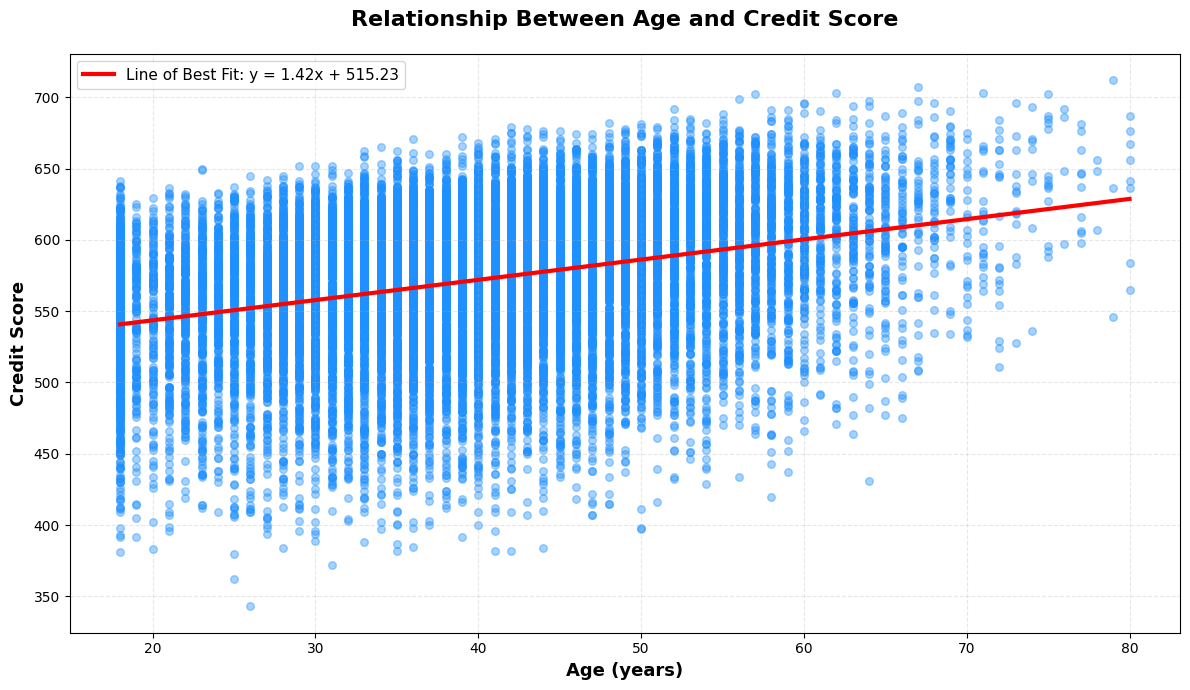

AGE vs CREDIT SCORE ANALYSIS

Line of Best Fit Equation:
  Credit Score = 1.4183 × Age + 515.2312

Slope: 1.4183
  Interpretation: For each additional year of age, credit score
  increases by approximately 1.42 points

Correlation Coefficient (r): 0.3232
  Interpretation: Moderate positive correlation

R² (Coefficient of Determination): 0.1045
  Interpretation: 10.45% of credit score variation
  can be explained by age


In [12]:
# Remove any rows with missing Age or CreditScore values for this analysis
df_clean = df.dropna(subset=['Age', 'CreditScore'])

print(f"Using {len(df_clean)} rows for analysis (removed {len(df) - len(df_clean)} rows with missing values)\n")

# Create scatter plot with line of best fit
plt.figure(figsize=(12, 7))

# Scatter plot
plt.scatter(df_clean['Age'], df_clean['CreditScore'], alpha=0.4, s=30, color='dodgerblue')

# Calculate and plot line of best fit
z = np.polyfit(df_clean['Age'], df_clean['CreditScore'], 1)
p = np.poly1d(z)
age_range = np.linspace(df_clean['Age'].min(), df_clean['Age'].max(), 100)
plt.plot(age_range, p(age_range), "r-", linewidth=3,
         label=f'Line of Best Fit: y = {z[0]:.2f}x + {z[1]:.2f}')

plt.title('Relationship Between Age and Credit Score', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age (years)', fontsize=13, fontweight='bold')
plt.ylabel('Credit Score', fontsize=13, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df_clean['Age'].corr(df_clean['CreditScore'])

print("=" * 60)
print("AGE vs CREDIT SCORE ANALYSIS")
print("=" * 60)
print(f"\nLine of Best Fit Equation:")
print(f"  Credit Score = {z[0]:.4f} × Age + {z[1]:.4f}")
print(f"\nSlope: {z[0]:.4f}")
print(f"  Interpretation: For each additional year of age, credit score")
print(f"  {'increases' if z[0] > 0 else 'decreases'} by approximately {abs(z[0]):.2f} points")
print(f"\nCorrelation Coefficient (r): {correlation:.4f}")

# Interpret correlation strength
if abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if correlation > 0 else "negative"
print(f"  Interpretation: {strength.capitalize()} {direction} correlation")
print(f"\nR² (Coefficient of Determination): {correlation**2:.4f}")
print(f"  Interpretation: {correlation**2*100:.2f}% of credit score variation")
print(f"  can be explained by age")

Based on the scatter plot and line of best fit there is a weak to moderate positive relationship between age and credit score the correlation coefficient of 0.3232 indicates a weak positive correlation the slope of 1.4183 which means that for every additional year of age, the credit score increases by approximately 1.42 points on average however the R² value of 0.1045 shows that only 10.45% of credit score variation can be explained by age, meaning other factors like payment history and debt levels play much more significant roles while older applicants tend to have slightly higher credit scores due to longer credit histories age alone is not a strong predictor of creditworthiness.

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

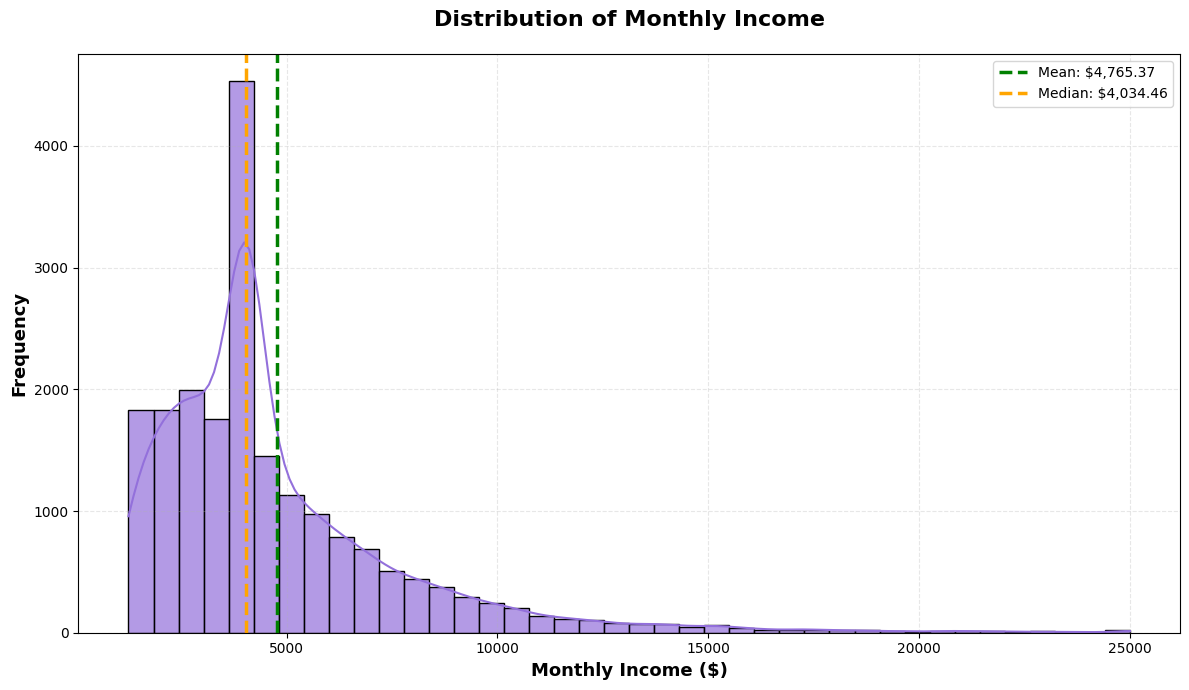

MONTHLY INCOME DISTRIBUTION ANALYSIS

Measures of Central Tendency:
  Mean:   $    4,765.37
  Median: $    4,034.46
  Mode:   $    4,034.46

Measures of Dispersion:
  Std Dev:   $    3,070.11
  Min:       $    1,250.00
  Max:       $   25,000.00
  Range:     $   23,750.00

Measures of Shape:
  Skewness:        2.2493
  Kurtosis:        7.5522

INTERPRETATION

Distribution Type: RIGHT-SKEWED (POSITIVELY SKEWED)

Skewness = 2.2493
  → Highly skewed distribution

Mean vs Median:
  Mean ($4,765.37) > Median ($4,034.46)
  Difference: 18.12% → Confirms right skew


In [14]:
from scipy import stats
# Create figure with histogram and KDE using seaborn
fig, ax = plt.subplots(figsize=(12, 7))

# Use seaborn's histplot with KDE
sns.histplot(df['MonthlyIncome'], bins=40, kde=True, color='mediumpurple',
             edgecolor='black', alpha=0.7, ax=ax)

# Add mean and median lines
mean_val = df['MonthlyIncome'].mean()
median_val = df['MonthlyIncome'].median()

ax.axvline(mean_val, color='green', linestyle='--', linewidth=2.5, label=f'Mean: ${mean_val:,.2f}')
ax.axvline(median_val, color='orange', linestyle='--', linewidth=2.5, label=f'Median: ${median_val:,.2f}')

# Customize plot
ax.set_title('Distribution of Monthly Income', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Monthly Income ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=13, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Calculate statistics
skewness = stats.skew(df['MonthlyIncome'])
kurtosis = stats.kurtosis(df['MonthlyIncome'])
mode_val = df['MonthlyIncome'].mode()[0]

print("=" * 60)
print("MONTHLY INCOME DISTRIBUTION ANALYSIS")
print("=" * 60)

# Central tendency measures
print("\nMeasures of Central Tendency:")
print(f"  Mean:   ${mean_val:>12,.2f}")
print(f"  Median: ${median_val:>12,.2f}")
print(f"  Mode:   ${mode_val:>12,.2f}")

# Dispersion measures
print(f"\nMeasures of Dispersion:")
print(f"  Std Dev:   ${df['MonthlyIncome'].std():>12,.2f}")
print(f"  Min:       ${df['MonthlyIncome'].min():>12,.2f}")
print(f"  Max:       ${df['MonthlyIncome'].max():>12,.2f}")
print(f"  Range:     ${df['MonthlyIncome'].max() - df['MonthlyIncome'].min():>12,.2f}")

# Shape measures
print(f"\nMeasures of Shape:")
print(f"  Skewness:  {skewness:>12.4f}")
print(f"  Kurtosis:  {kurtosis:>12.4f}")

# Interpret skewness
print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)

if abs(skewness) < 0.5:
    distribution_type = "approximately normal (symmetric)"
elif skewness > 0:
    distribution_type = "right-skewed (positively skewed)"
else:
    distribution_type = "left-skewed (negatively skewed)"

print(f"\nDistribution Type: {distribution_type.upper()}")
print(f"\nSkewness = {skewness:.4f}")
if abs(skewness) < 0.5:
    print("  → Nearly symmetric distribution")
elif 0.5 <= abs(skewness) < 1:
    print("  → Moderately skewed distribution")
else:
    print("  → Highly skewed distribution")

print(f"\nMean vs Median:")
diff_pct = abs(mean_val - median_val) / median_val * 100
if mean_val > median_val:
    print(f"  Mean (${mean_val:,.2f}) > Median (${median_val:,.2f})")
    print(f"  Difference: {diff_pct:.2f}% → Confirms right skew")
elif mean_val < median_val:
    print(f"  Mean (${mean_val:,.2f}) < Median (${median_val:,.2f})")
    print(f"  Difference: {diff_pct:.2f}% → Confirms left skew")
else:
    print(f"  Mean ≈ Median → Confirms symmetry")

The distribution of applicants monthly income is right skewed. The skewness coefficient of is 2.2493 the mean is greater than the median.

## Data Preparation for Modelling

## Modelling

## Evaluation

## Bonus (Optional)